# Finding Donors for CharityML


* in this project i will employ several supervised algorithms of my choice to accurately model individuals 'income using data collected from the 1994 U.S. Census. i will then choose the best candidate algorithm from preliminary results . 

* my goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. 

* The dataset for this project originates from the UCI Machine Learning Repository. The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid". You can find the article by Ron Kohavi online. The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.



### data description 

###### Features

- age: Age

- workclass: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

- education_level: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)

- education-num: Number of educational years completed

- marital-status: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)

- occupation: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

- relationship: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

- race: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

- sex: Sex (Female, Male)

- capital-gain: Monetary Capital Gains

- capital-loss: Monetary Capital Losses

- hours-per-week: Average Hours Per Week Worked

- native-country: Native Country 
	(United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China,
 	Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos,
 	Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)


###### Target Variable

- income: Income Class (<=50K, >50K)


### load the data 

In [98]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


from sklearn.model_selection import train_test_split 


sns.set()
%matplotlib inline

# Load the Census dataset
df = pd.read_csv("census.csv")

print('the data has {} column and {} rows'.format(df.shape[1] ,df.shape[0]))

the data has 14 column and 45222 rows


## data assesing
in this part i will see the data to know if it hase inu issues und make a good understanding of it 

In [4]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- its wierd but some column name has **-** and some has **_**


- the income rate need to be categorial with **1** for **<=50k**
- the income rate need to be categorial with **0** for **>50k**

In [5]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


- **age** has a continous range from 17 to 90 
- **education** has a continous integer range from 1 to 16 with good variance 
- **capital gain - capital loss** has a continous range but they have many zeros 
- **hours-per-week** has a continous integer range from 1 to 99 with good variance 

In [7]:
df.describe(include=['object'])

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


- **here as you see the categorial data and its values**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education_level  45222 non-null  object
 3   education-num    45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   sex              45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


- the data doesn't has any null values and the data types are perfect

In [11]:
# check duplicate values 
df.duplicated().sum()

5982

- there is duplicate row and this will not add any thing to the exploration or the model

#### data cleaning 

In [101]:
# change the column name to have _ instead of - so it become easier to use 
df.columns = [sub.replace('-', '_') for sub in df.columns]

# change the income column from string to boolean
#  >=50 --> 1   , <50 --> 0
df['income'] = df['income'].str.contains('>').astype(int)

# drop the duplicate rows 
df.drop_duplicates(inplace=True)

df.shape

(39240, 14)

# data exploration 

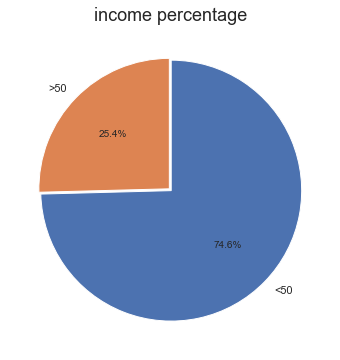

In [40]:
## see income counts
rcParams['figure.figsize'] =(8,6)
plt.pie(x=df['income'].value_counts().values ,explode = [0.01,0.01] ,
            labels =['<50', '>50'] , startangle = 90, autopct= '%1.1f%%', counterclock = False );
plt.title('income percentage' ,fontsize=18);

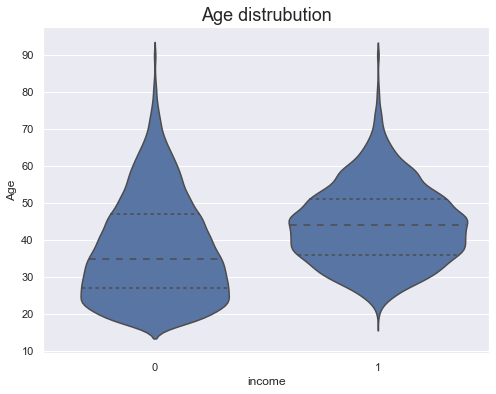

In [42]:
# see the destribution of age over the income
sns.set()
rcParams['figure.figsize'] =(8,6)
sns.violinplot(data=df, x='income', y='age', color=sns.color_palette()[0] , inner='quartile' );
plt.xlabel('income');
plt.ylabel('Age');
plt.title('Age distrubution' , fontsize=18);

*the age has a relation with the income as the small ages "less than 25"  are more likely to be <=50 
but the medium age "from 30 to 55" have invome >50*

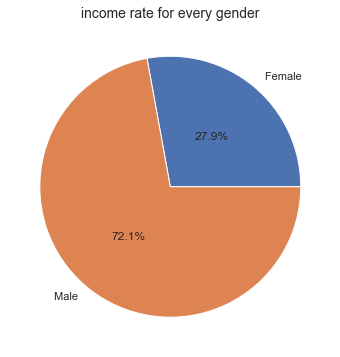

In [54]:
data = df.groupby(['sex']).mean()['income']
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", normalize=True, labels=labels, pctdistance=0.5)
plt.title("income rate for every gender", fontsize=14);


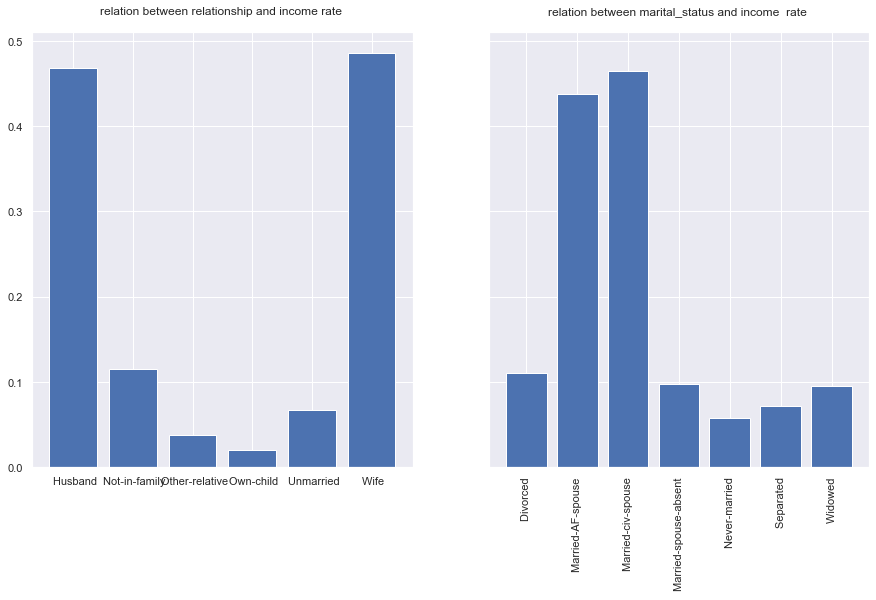

In [94]:
sns.set()

fig, ax1  = plt.subplots(1, 2 , figsize=(15 , 8) , sharey=True)
plt.xticks( rotation='vertical')

plt.xticks( rotation='vertical')

data = df.groupby(['relationship' ]).mean()['income']
ax1[0].bar(data.index , data.values  ) ; 
ax1[0].set_title('relation between relationship and income rate \n ');


data = df.groupby([ 'marital_status' ]).mean()['income']
ax1[1].bar(data.index , data.values ) ; 
ax1[1].set_title('relation between marital_status and income  rate \n ');


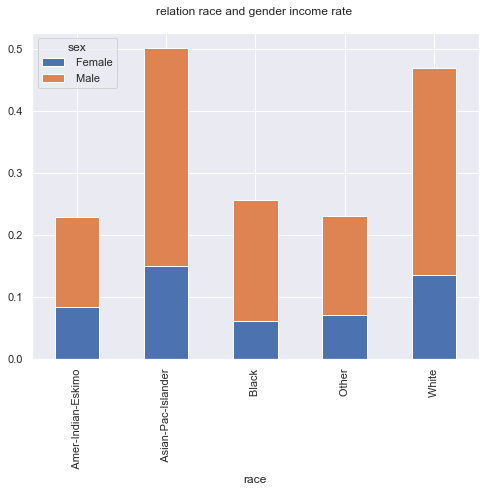

In [93]:
data = df.groupby(['race' , 'sex']).mean()['income']
data.unstack().plot(kind='bar' , stacked=True ) ; 
plt.title('relation race and gender income rate \n ');



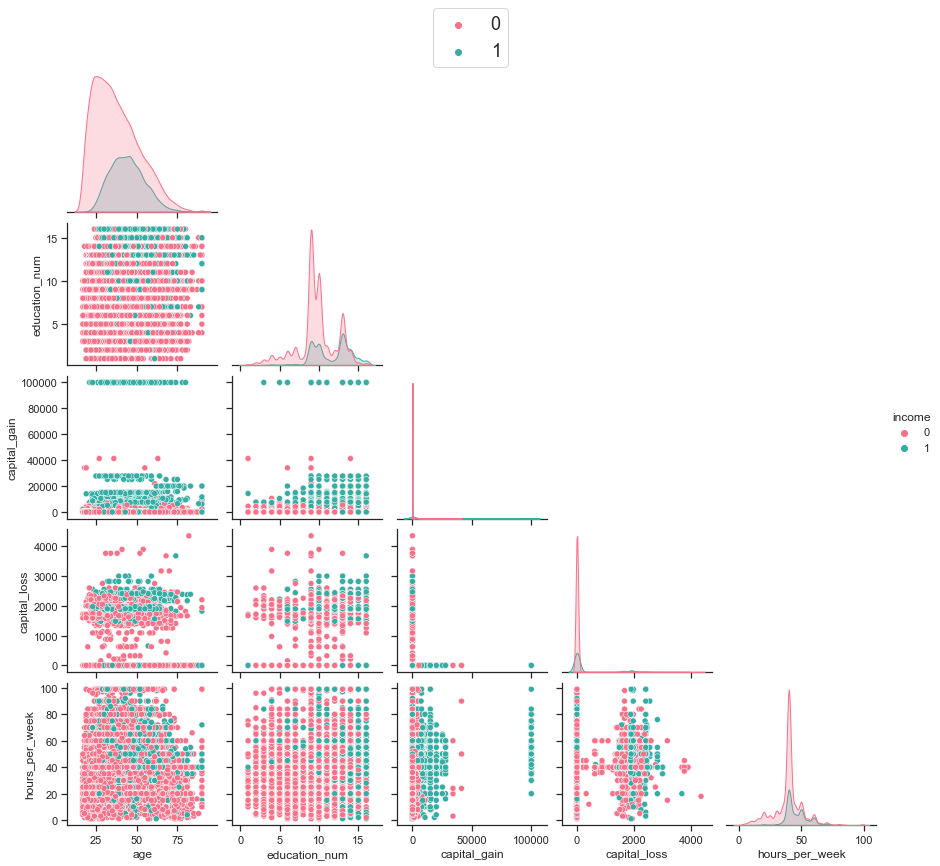

In [88]:
g = sns.set(style="ticks", color_codes=True)
g= sns.pairplot(df, hue="income", palette="husl",corner=True );
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1 , fontsize=18);
g.fig.subplots_adjust(top=0.92, bottom=0.08);


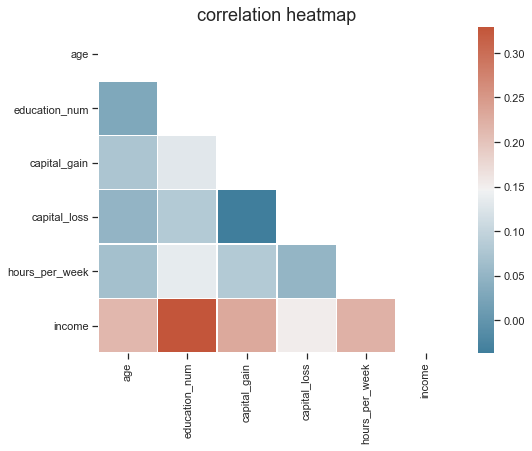

In [44]:
g = sns.set(style="ticks", color_codes=True)

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool));
cmap = sns.diverging_palette(230, 20, as_cmap=True);
sns.heatmap(corr, mask=mask, cmap=cmap , linewidths=.5);
plt.title('correlation heatmap' , fontsize=18);

- the education num has the strong relation with the incmome 
- the capital los has the week relation 
- the rest has a moderate relation

# data preperation for the classification model 



##### convert categorial data to numerical


In [102]:
string_cols = df.select_dtypes('object').columns
    
for col in string_cols :
    #fill the null with the mode
    df[col] = df[col].astype('category').cat.codes
df.dtypes

age                int64
workclass           int8
education_level     int8
education_num      int64
marital_status      int8
occupation          int8
relationship        int8
race                int8
sex                 int8
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country      int8
income             int32
dtype: object

In [115]:
# determine the input and the output 
X = df.drop('income' , axis=1)
y = df['income']

# data scaling
X = (X - X.mean()) / X.std()

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True) 


X_train.shape , y_train.shape

((27468, 13), (27468,))

# build the models 

here i will try some algorithms and get the f score of every one of tghem to hnow the best model.

- logistic regression 
- logistic regression with polynomial 
- SVC
- nural networks
- naive bias 
- descion tree
- random forest
- k-mean

In [181]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 

sns.set(style="ticks", color_codes=True)


<h3> 1- logistic regression </h3>

LogisticRegressionModel Train Score is :  0.8174603174603174
LogisticRegressionModel Test Score is :  0.8177030241250425


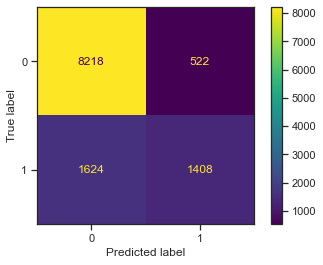

In [269]:
LogisticRegressionModel = LogisticRegression(penalty='l1', solver='liblinear' , C=1 ,random_state=33) 
LogisticRegressionModel.fit(X_train, y_train) 
 
#Calculating Details 

lr_train = LogisticRegressionModel.score(X_train, y_train)
lr_test = LogisticRegressionModel.score(X_test, y_test)
print('LogisticRegressionModel Train Score is : ' ,lr_train ) 
print('LogisticRegressionModel Test Score is : ' , lr_test) 

y_pred = LogisticRegressionModel.predict(X_test)
plot_confusion_matrix(LogisticRegressionModel, X_test, y_test ) ;
plt.show()

<h3> 2-logistic regression with polynomial features </h3>

LogisticRegressionModel with polynomial features Train Score is :  0.8431265472549876
LogisticRegressionModel with polynomial features Test Score is :  0.8396194359497112


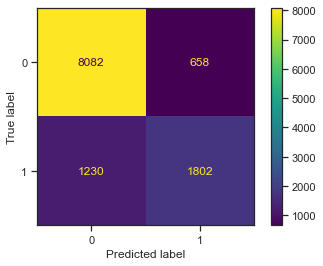

In [271]:
poly = PolynomialFeatures( degree = 2 , include_bias = False) 
poly.fit(X) 
x_poly = poly.transform(X) 
 
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(x_poly, y, test_size=0.3, random_state=44, shuffle =True) 

logisticRegressionModel = LogisticRegression(penalty='l2', solver='sag' , max_iter=10000 , C=1 ,random_state=33) 
logisticRegressionModel.fit(X_ptrain, y_ptrain) 
 
lrp_train = logisticRegressionModel.score(X_ptrain, y_ptrain)
lrp_test  = logisticRegressionModel.score(X_ptest, y_ptest)
print('LogisticRegressionModel with polynomial features Train Score is : ' , lrp_train) 
print('LogisticRegressionModel with polynomial features Test Score is : ' , lrp_test) 

y_pred = logisticRegressionModel.predict(X_ptest)
plot_confusion_matrix(logisticRegressionModel, X_ptest, y_ptest ) ;
plt.show()
 

<h3>3-Neural Network</h3>

MLPClassifierModel Train Score is :  0.842325615261395
MLPClassifierModel Test Score is :  0.8400441726129799


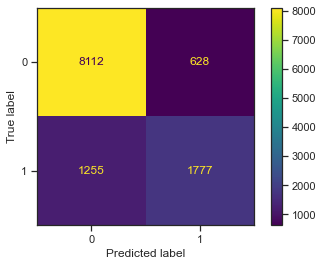

In [272]:
MLPClassifierModel = MLPClassifier(activation='tanh', 
                                   solver='sgd',  
                                   learning_rate='constant', 
                                   early_stopping= False,                                
                                   alpha=0.00001 ,hidden_layer_sizes=(100, 3),random_state=33) 
MLPClassifierModel.fit(X_train, y_train) 


nn_train = MLPClassifierModel.score(X_train, y_train)
nn_test =  MLPClassifierModel.score(X_test, y_test)
print('MLPClassifierModel Train Score is : ' , nn_train) 
print('MLPClassifierModel Test Score is : ' , nn_test)

y_pred = MLPClassifierModel.predict(X_test)
plot_confusion_matrix(MLPClassifierModel, X_test, y_test ) ;
plt.show()



<h3> 4-support vector </h3>

SVCModel Train Score is :  0.8594000291247997
SVCModel Test Score is :  0.8394495412844036


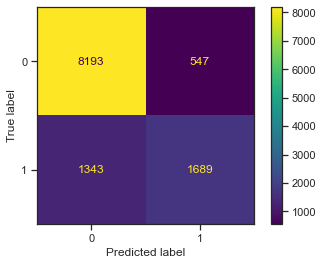

In [273]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100000 , C=10 ,gamma='scale') 
SVCModel.fit(X_train, y_train) 



#Calculating Details 
sv_train = SVCModel.score(X_train, y_train)
sv_test = SVCModel.score(X_test, y_test)
print('SVCModel Train Score is : ' , sv_train) 
print('SVCModel Test Score is : ' , sv_test) 

y_pred = SVCModel.predict(X_test)
plot_confusion_matrix(SVCModel, X_test, y_test ) ;
plt.show()


<h3> 5-k-nearsest neighbour </h3>

In [274]:

KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 10 , weights='distance', 
                                               algorithm = 'auto')   
KNeighborsRegressorModel.fit(X_train, y_train) 
 
#Calculating Details 
knn_train = KNeighborsRegressorModel.score(X_train, y_train)
knn_test = KNeighborsRegressorModel.score(X_test, y_test)
print('KNeighborsRegressorModel Train Score is : ' , knn_train ) 
print('KNeighborsRegressorModel Test Score is : ' , knn_test) 


KNeighborsRegressorModel Train Score is :  0.953161499686941
KNeighborsRegressorModel Test Score is :  0.23364631455516693


#### thats abviously over fitting 

<h3> 6-descion tree </h3>

DecisionTreeClassifierModel Train Score is :  0.8569244211446047
DecisionTreeClassifierModel Test Score is :  0.8501529051987767


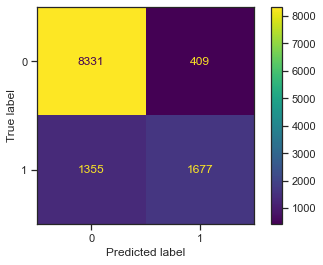

In [275]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=33)
DecisionTreeClassifierModel.fit(X_train, y_train) 
 

#Calculating Details 
dt_train = DecisionTreeClassifierModel.score(X_train, y_train)
dt_test = DecisionTreeClassifierModel.score(X_test, y_test)
print('DecisionTreeClassifierModel Train Score is : ' ,dt_train ) 
print('DecisionTreeClassifierModel Test Score is : ' , dt_test) 

y_pred = DecisionTreeClassifierModel.predict(X_test)
plot_confusion_matrix(DecisionTreeClassifierModel, X_test, y_test ) ;
plt.show()
 

<h3> 7-random forest </h3>

randomforest Train Score is :  0.972986748216106
randomforest Test Score is :  0.9731566428814136


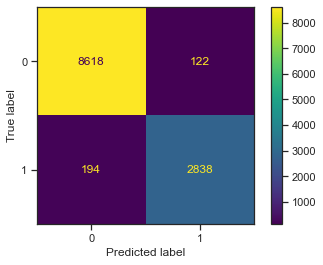

In [276]:
clf = RandomForestClassifier( max_depth=30 , random_state=0)
clf.fit(X, y)

#Calculating Details 
rf_train = clf.score(X_train, y_train)
rf_test = clf.score(X_test, y_test)
print('randomforest Train Score is : ' , rf_train) 
print('randomforest Test Score is : ' , rf_test) 


y_pred = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test ) ;
plt.show()


<h3> 8-Naïve Bayes </h3>

In [277]:
BernoulliNBModel = BernoulliNB(alpha=1,binarize=.1) 
BernoulliNBModel.fit(X_train, y_train) 


nb_train =BernoulliNBModel.score(X_train, y_train)
nb_test = BernoulliNBModel.score(X_test, y_test)
print('BernoulliNBModel Train Score is : ' , nb_train) 
print('BernoulliNBModel Test Score is : ' , nb_test)

BernoulliNBModel Train Score is :  0.7903378476772972
BernoulliNBModel Test Score is :  0.7915392456676861


# make a data frame of the different models results

In [290]:
models = pd.DataFrame({
    'Model': ['logistic regression ', 'logistic regression with polynomial', 'Neural Network', 
              'SVC', 'k-nearsest neighbour', 'decision tree', 
              'random forest', 'Naïve Bayes'] ,
    'Train_score': [lr_train, lrp_train, nn_train, 
              sv_train, knn_train, dt_train, 
              rf_train, nb_train] , 
    'Test_score' :[lr_test,lrp_test ,nn_test,
                    sv_test,knn_test,dt_test,rf_test,nb_test] })

models['score'] = models["Train_score"]*models['Test_score']
models.sort_values(  ['score'] , ascending=False).drop('score' , axis=1)

,Model,Train_score,Test_score
6,random forest,0.972987,0.973157
5,decision tree,0.856924,0.850153
3,SVC,0.859400,0.839450
1,logistic regression with polynomial,0.843127,0.839619
2,Neural Network,0.842326,0.840044
0,logistic regression,0.817460,0.817703
7,Naïve Bayes,0.790338,0.791539
4,k-nearsest neighbour,0.953161,0.233646


# the best model is random forest 